In [15]:
%run util.py

# Limit Cycles

actually taken from Lynch, Stephen. Dynamical systems with applications using python. Basel, Switzerland: Birkhäuser, 2018.



$$
\begin{align}
x' &= y - 8x^3 \\
y' &= 2y - 4x - 2y^3
\end{align}
$$

There is fixed point at $(0,0)$ which is unstable. The Jacob matrix has the following form

$$
J = \begin{pmatrix} -24x^2 & 1 \\ -4 & 2-6y^2 \end{pmatrix}
$$

At the fixed point $(0,0)$ the matrix becomes

$$
J = \begin{pmatrix} 0 & 1 \\ -4 & 2 \end{pmatrix}
$$



In [16]:
A = np.array([[0., 1.], [-4., 2.0]])
lin.eig(A)

(array([1.+1.73205081j, 1.-1.73205081j]),
 array([[0.2236068 -0.38729833j, 0.2236068 +0.38729833j],
        [0.89442719+0.j        , 0.89442719-0.j        ]]))

The eigenvalues have a positive real part, therefore the fixed point is unstable.

There is a limit cycle somewhere around $(0,0)$, but I don't know how this can be found => TBD

In [17]:
def dX_dt(X, t=0):
    return np.array([ X[1] - 8*X[0]**3 ,
                      2*X[1] - 4*X[0] - 2*X[1]**3 ])

In [18]:
t  = np.linspace(0, 20, 1000)
y0_1 = [2. , 4.]
y0_2 = [0.1 , 0.1]

X1, infodict = int.odeint(dX_dt, y0_1, t, full_output=True)
X2, infodict = int.odeint(dX_dt, y0_2, t, full_output=True)

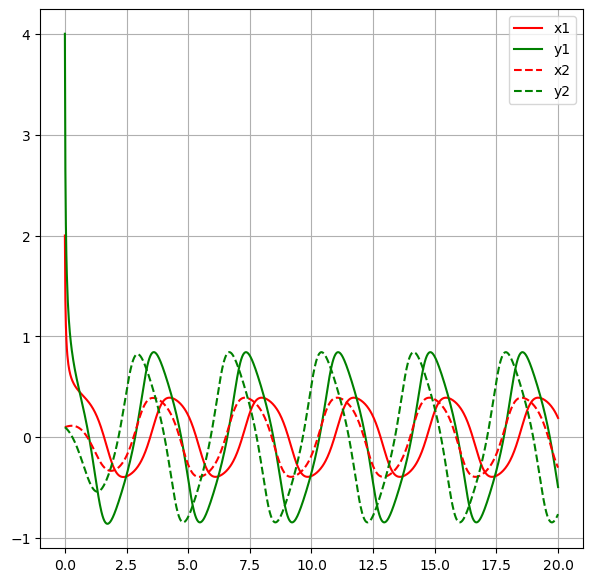

In [19]:
x1, y1 = X1.T
x2, y2 = X2.T

plt.plot(t, x1, 'r-', label='x1')
plt.plot(t, y1 , 'g-', label='y1')
plt.plot(t, x2, 'r--', label='x2')
plt.plot(t, y2 , 'g--', label='y2')

plt.grid()
plt.legend(loc='best')

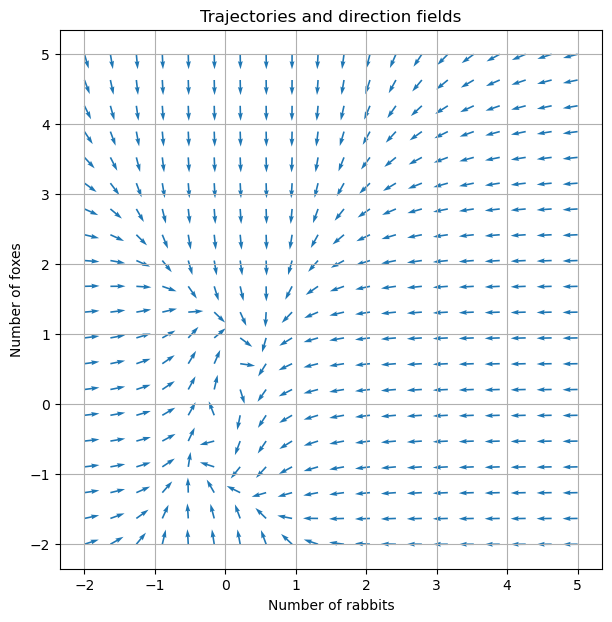

In [20]:
x = np.linspace(-2, 5, 20)
y = np.linspace(-2, 5, 20)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.grid()